## Imports

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from tfm.utils.utils import plot_corr_columns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Crear tablas de resultados en Latex

In [2]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

data = pd.read_csv("../metrics/metrics.csv")

# Redondear todos los valores numéricos a 4 decimales
data = data.round(4)
data['id'] = range(1, len(data) + 1)
cols = ['id'] + data.columns[:-1].tolist()
data = data[cols]
data.head(5)

,id,creation_timestamp,Model,Model_name,Umbral_minimo,Cantidad_a_generar_por_llamada,Max_ejemplos_input,Temperature,Frequency_penalty,Presence_penalty,mean_distance_difference_centroid,mean_ai_to_all_human_distance,frac_comunes_ai_2gram,frac_comunes_human_2gram,unicos_ai_prop_2gram,unicos_human_prop_2gram,novedad_2gram,frac_comunes_ai_3gram,frac_comunes_human_3gram,unicos_ai_prop_3gram,unicos_human_prop_3gram,novedad_3gram,ai_detection_accuracy,best_f1_train,best_f1_val,best_f1_test
0,1,2025-06-14T18:02:22.146208,vllm,meta-llama/Llama-3.2-3B-Instruct,100,5,5,0.5,0.0,0.0,0.0053,0.0320,0.8479,0.0091,1.5405,0.801,349,0.5775,0.0066,2.1318,1.4135,840,0.0507,0.7541,0.7306,0.7325
1,2,2025-06-21T13:04:17.479032,vllm,meta-llama/Llama-3.2-3B-Instruct,250,5,5,0.5,0.0,0.0,0.0082,0.0363,0.8896,0.0555,0.5737,0.801,838,0.6378,0.0427,0.9548,1.4135,2208,0.1167,0.7340,0.7212,0.7224
2,3,2025-06-21T15:14:27.586185,vllm,meta-llama/Llama-3.2-3B-Instruct,500,5,5,0.5,0.0,0.0,0.0077,0.0370,0.8961,0.1708,0.2964,0.801,1541,0.6598,0.1343,0.5352,1.4135,4188,0.1104,0.7139,0.7261,0.7283
3,4,2025-06-22T12:47:12.686526,vllm,meta-llama/Llama-3.2-3B-Instruct,1000,5,5,0.5,0.0,0.0,0.0066,0.0369,0.8972,0.4938,0.1476,0.801,2523,0.6630,0.3880,0.2869,1.4135,7010,0.1092,0.6439,0.7195,0.7204
4,5,2025-06-22T23:10:48.988651,vllm,meta-llama/Llama-3.2-3B-Instruct,100,5,5,0.5,1.0,1.0,0.0097,0.0347,0.7176,0.0086,2.8949,0.801,940,0.4103,0.0053,3.8062,1.4135,1814,0.1314,0.7519,0.7298,0.7325


### Parametros de generación

In [3]:
data_parameters_columns = ['id', 'Model_name', 'Umbral_minimo', 'Cantidad_a_generar_por_llamada', 'Frequency_penalty', 'Presence_penalty'] # Se quitan Model, Max_ejemplos_input, Temperature
data_parameters = data[data_parameters_columns].reset_index(drop=True)
latex_parameters_table = data_parameters.to_latex(index=False, float_format="%.4f", escape=False, column_format='l' + 'c' * (len(data_parameters_columns) - 1))
print(latex_parameters_table.replace('_', '\_'))

\begin{tabular}{lccccc}
\toprule
id & Model\_name & Umbral\_minimo & Cantidad\_a\_generar\_por\_llamada & Frequency\_penalty & Presence\_penalty \\
\midrule
1 & meta-llama/Llama-3.2-3B-Instruct & 100 & 5 & 0.0000 & 0.0000 \\
2 & meta-llama/Llama-3.2-3B-Instruct & 250 & 5 & 0.0000 & 0.0000 \\
3 & meta-llama/Llama-3.2-3B-Instruct & 500 & 5 & 0.0000 & 0.0000 \\
4 & meta-llama/Llama-3.2-3B-Instruct & 1000 & 5 & 0.0000 & 0.0000 \\
5 & meta-llama/Llama-3.2-3B-Instruct & 100 & 5 & 1.0000 & 1.0000 \\
6 & meta-llama/Llama-3.2-3B-Instruct & 250 & 5 & 1.0000 & 1.0000 \\
7 & meta-llama/Llama-3.2-3B-Instruct & 500 & 5 & 1.0000 & 1.0000 \\
8 & meta-llama/Llama-3.2-3B-Instruct & 1000 & 5 & 1.0000 & 1.0000 \\
9 & gpt-4o-mini & 100 & 5 & 0.0000 & 0.0000 \\
10 & gpt-4o-mini & 250 & 5 & 0.0000 & 0.0000 \\
11 & gpt-4o-mini & 500 & 5 & 0.0000 & 0.0000 \\
12 & gpt-4o-mini & 1000 & 15 & 0.0000 & 0.0000 \\
13 & gpt-4o-mini & 100 & 5 & 1.0000 & 1.0000 \\
14 & gpt-4o-mini & 250 & 5 & 1.0000 & 1.0000 \\
15 & gpt

### Métricas de evaluación

#### Métricas de semántica, precisión del modelo discriminatorio y resultados de clasificación

In [4]:
data_metrics_columns = ['id', 'mean_distance_difference_centroid', 'mean_ai_to_all_human_distance', 'ai_detection_accuracy', 'best_f1_train', 'best_f1_val', 'best_f1_test'] # Se quitan Model, Max_ejemplos_input, Temperature
data_metrics = data[data_metrics_columns].reset_index(drop=True)
latex_metrics_table = data_metrics.to_latex(index=False, float_format="%.4f", escape=False, column_format='l' + 'c' * (len(data_metrics_columns) - 1))
print(latex_metrics_table.replace('_', '\_'))

\begin{tabular}{lcccccc}
\toprule
id & mean\_distance\_difference\_centroid & mean\_ai\_to\_all\_human\_distance & ai\_detection\_accuracy & best\_f1\_train & best\_f1\_val & best\_f1\_test \\
\midrule
1 & 0.0053 & 0.0320 & 0.0507 & 0.7541 & 0.7306 & 0.7325 \\
2 & 0.0082 & 0.0363 & 0.1167 & 0.7340 & 0.7212 & 0.7224 \\
3 & 0.0077 & 0.0370 & 0.1104 & 0.7139 & 0.7261 & 0.7283 \\
4 & 0.0066 & 0.0369 & 0.1092 & 0.6439 & 0.7195 & 0.7204 \\
5 & 0.0097 & 0.0347 & 0.1314 & 0.7519 & 0.7298 & 0.7325 \\
6 & 0.0095 & 0.0376 & 0.1302 & 0.7319 & 0.7192 & 0.7233 \\
7 & 0.0092 & 0.0384 & 0.1302 & 0.7054 & 0.7217 & 0.7223 \\
8 & 0.0078 & 0.0382 & 0.1344 & 0.6365 & 0.7156 & 0.7175 \\
9 & 0.0101 & 0.0343 & 0.0081 & 0.7471 & 0.7247 & 0.7268 \\
10 & 0.0086 & 0.0360 & 0.0100 & 0.7378 & 0.7244 & 0.7255 \\
11 & 0.0077 & 0.0369 & 0.0108 & 0.7058 & 0.7114 & 0.7119 \\
12 & 0.0069 & 0.0374 & 0.0269 & 0.6460 & 0.7169 & 0.7196 \\
13 & 0.0101 & 0.0350 & 0.0161 & 0.7447 & 0.7234 & 0.7244 \\
14 & 0.0091 & 0.0365 & 0.02

#### Métricas léxicas Bigramas

In [5]:
data_metrics_columns_2 = ['id', 'frac_comunes_ai_2gram', 'frac_comunes_human_2gram', 'unicos_ai_prop_2gram', 'unicos_human_prop_2gram', 'novedad_2gram'] 
data_metrics_2 = data[data_metrics_columns_2].reset_index(drop=True)
latex_metrics_table_2 = data_metrics_2.to_latex(index=False, float_format="%.4f", escape=False, column_format='l' + 'c' * (len(data_metrics_columns_2) - 1))
print(latex_metrics_table_2.replace('_', '\_'))

\begin{tabular}{lccccc}
\toprule
id & frac\_comunes\_ai\_2gram & frac\_comunes\_human\_2gram & unicos\_ai\_prop\_2gram & unicos\_human\_prop\_2gram & novedad\_2gram \\
\midrule
1 & 0.8479 & 0.0091 & 1.5405 & 0.8010 & 349 \\
2 & 0.8896 & 0.0555 & 0.5737 & 0.8010 & 838 \\
3 & 0.8961 & 0.1708 & 0.2964 & 0.8010 & 1541 \\
4 & 0.8972 & 0.4938 & 0.1476 & 0.8010 & 2523 \\
5 & 0.7176 & 0.0086 & 2.8949 & 0.8010 & 940 \\
6 & 0.7379 & 0.0424 & 1.2705 & 0.8010 & 2461 \\
7 & 0.7373 & 0.1311 & 0.7187 & 0.8010 & 4925 \\
8 & 0.7419 & 0.3903 & 0.4040 & 0.8010 & 8813 \\
9 & 0.8493 & 0.0070 & 1.0290 & 0.8010 & 206 \\
10 & 0.8321 & 0.0318 & 0.3388 & 0.8010 & 411 \\
11 & 0.8270 & 0.0978 & 0.1513 & 0.8010 & 659 \\
12 & 0.8302 & 0.3135 & 0.0943 & 0.8010 & 1476 \\
13 & 0.7915 & 0.0064 & 1.2403 & 0.8010 & 295 \\
14 & 0.7996 & 0.0312 & 0.4013 & 0.8010 & 539 \\
15 & 0.7914 & 0.0962 & 0.1915 & 0.8010 & 899 \\
16 & 0.6553 & 0.2800 & 0.2184 & 0.8010 & 4499 \\
\bottomrule
\end{tabular}



#### Métricas léxicas Trigramas

In [6]:
data_metrics_columns_3 = ['id', 'frac_comunes_ai_3gram', 'frac_comunes_human_3gram', 'unicos_ai_prop_3gram', 'unicos_human_prop_3gram', 'novedad_3gram'] 
data_metrics_3 = data[data_metrics_columns_3].reset_index(drop=True)
latex_metrics_table_3 = data_metrics_3.to_latex(index=False, float_format="%.4f", escape=False, column_format='l' + 'c' * (len(data_metrics_columns_3) - 1))
print(latex_metrics_table_3.replace('_', '\_'))

\begin{tabular}{lccccc}
\toprule
id & frac\_comunes\_ai\_3gram & frac\_comunes\_human\_3gram & unicos\_ai\_prop\_3gram & unicos\_human\_prop\_3gram & novedad\_3gram \\
\midrule
1 & 0.5775 & 0.0066 & 2.1318 & 1.4135 & 840 \\
2 & 0.6378 & 0.0427 & 0.9548 & 1.4135 & 2208 \\
3 & 0.6598 & 0.1343 & 0.5352 & 1.4135 & 4188 \\
4 & 0.6630 & 0.3880 & 0.2869 & 1.4135 & 7010 \\
5 & 0.4103 & 0.0053 & 3.8062 & 1.4135 & 1814 \\
6 & 0.4265 & 0.0260 & 1.9596 & 1.4135 & 5251 \\
7 & 0.4238 & 0.0796 & 1.2166 & 1.4135 & 10830 \\
8 & 0.4285 & 0.2379 & 0.7642 & 1.4135 & 20760 \\
9 & 0.6001 & 0.0049 & 1.3871 & 1.4135 & 494 \\
10 & 0.5612 & 0.0209 & 0.5118 & 1.4135 & 1060 \\
11 & 0.5479 & 0.0629 & 0.2496 & 1.4135 & 1734 \\
12 & 0.5588 & 0.2076 & 0.1769 & 1.4135 & 4065 \\
13 & 0.5011 & 0.0040 & 1.6258 & 1.4135 & 656 \\
14 & 0.4874 & 0.0186 & 0.6069 & 1.4135 & 1373 \\
15 & 0.4749 & 0.0564 & 0.3150 & 1.4135 & 2359 \\
16 & 0.3211 & 0.1390 & 0.4650 & 1.4135 & 12489 \\
\bottomrule
\end{tabular}



## Estudio de resultados

### Correlaciones

In [7]:
data_parameters_columns.remove('id')
data_parameters_columns.remove('Model_name')
data_metrics_columns.remove('id')
data_metrics_columns_2.remove('id')
data_metrics_columns_2.remove('unicos_human_prop_2gram')
data_metrics_columns_3.remove('id')
data_metrics_columns_3.remove('unicos_human_prop_3gram')

In [14]:
data_metrics_columns

['mean_distance_difference_centroid',
 'mean_ai_to_all_human_distance',
 'ai_detection_accuracy',
 'best_f1_train',
 'best_f1_val',
 'best_f1_test']

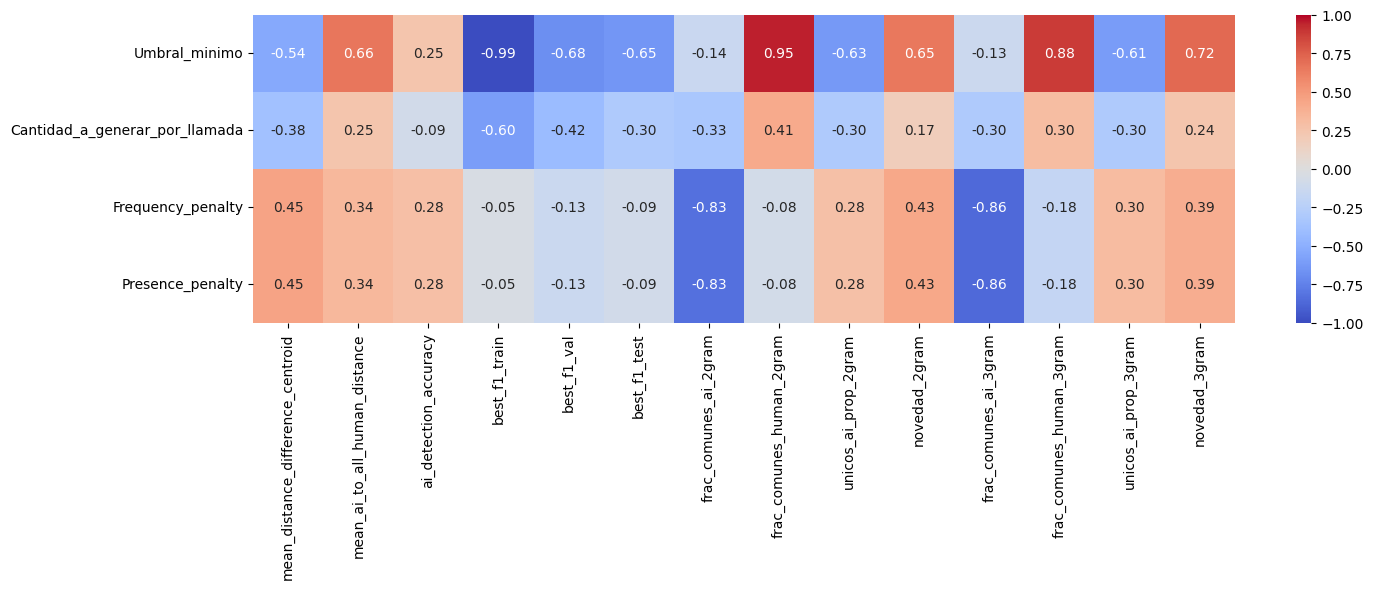

In [8]:
plot_corr_columns(data, data_parameters_columns, data_metrics_columns + data_metrics_columns_2 + data_metrics_columns_3)

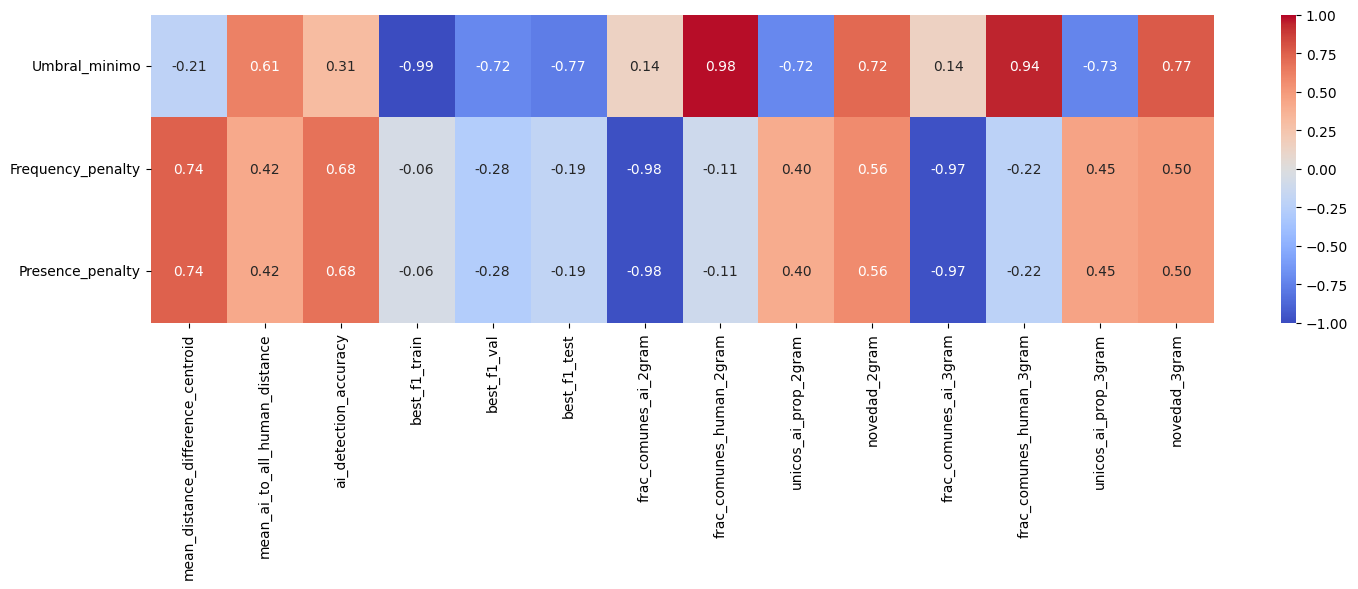

In [9]:
data_parameters_columns_aux = data_parameters_columns
data_parameters_columns_aux.remove('Cantidad_a_generar_por_llamada') # En este caso siempre tiene el mismo valor, por lo que no aporta información
plot_corr_columns(data[data['Model_name']=='meta-llama/Llama-3.2-3B-Instruct'], data_parameters_columns_aux, data_metrics_columns + data_metrics_columns_2 + data_metrics_columns_3)

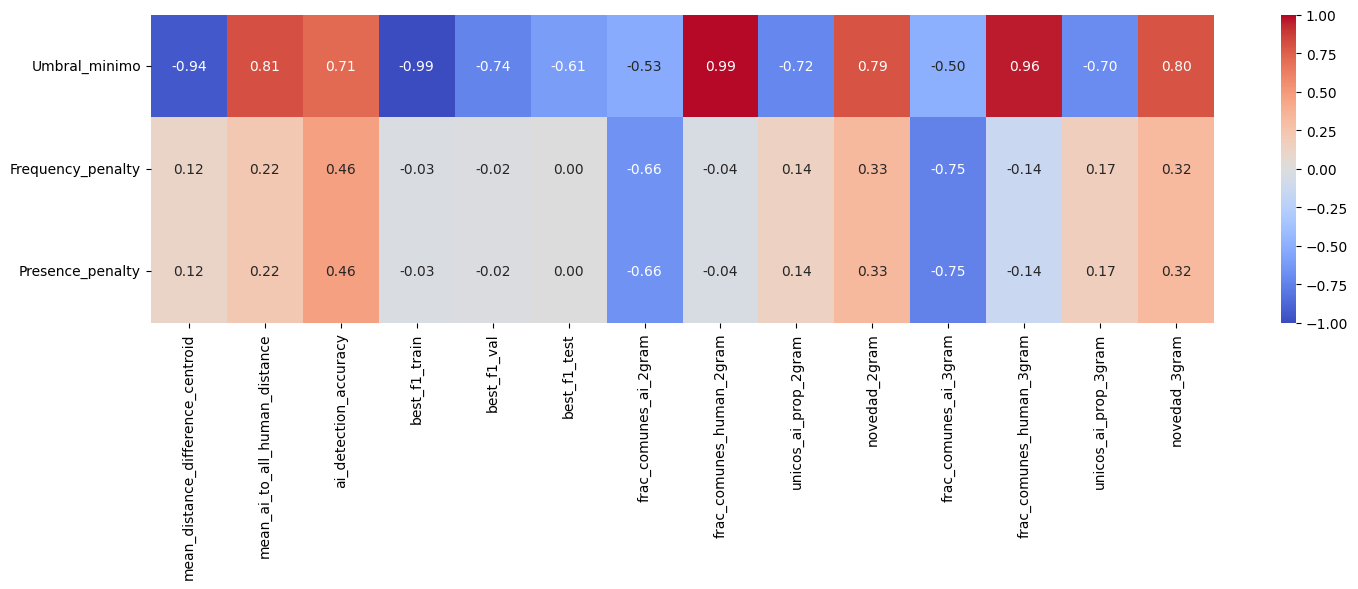

In [10]:
plot_corr_columns(data[data['Model_name']=='gpt-4o-mini'], data_parameters_columns, data_metrics_columns + data_metrics_columns_2 + data_metrics_columns_3)

### Radar

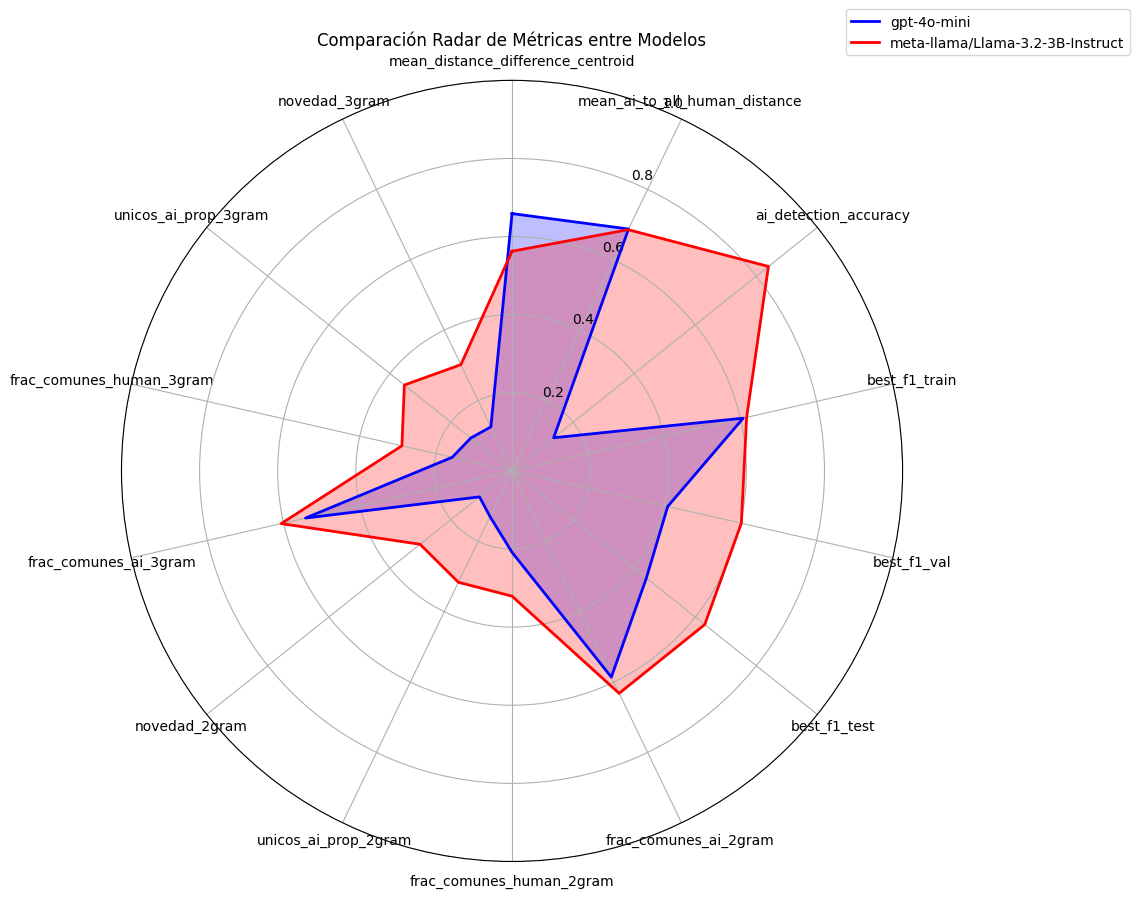

In [11]:
models = ['gpt-4o-mini', 'meta-llama/Llama-3.2-3B-Instruct']
metrics = data_metrics_columns + data_metrics_columns_2 + data_metrics_columns_3

means = data.groupby('Model_name')[metrics].mean()

min_vals_global = data[metrics].min()
max_vals_global = data[metrics].max()
means_norm = (means - min_vals_global) / (max_vals_global - min_vals_global)


num_vars = len(metrics)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 9), subplot_kw=dict(polar=True))

def prepare_values(row):
    values = row.tolist()
    values += values[:1]
    return values

colors = ['b', 'r']

for i, model in enumerate(models):
    values = prepare_values(means_norm.loc[model])
    ax.plot(angles, values, color=colors[i], linewidth=2, label=model)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)

ax.set_ylim(0, 1)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Comparación Radar de Métricas entre Modelos')

plt.tight_layout()
plt.show()
